# Customer Analytics Customer Behavior

The importance of customer analytics is rising: because access to customer data became easier
for many businesses, and also customers now have easier access to data and information on similar
products and contents provided by other competitors, it is critical to many businesses to be
able to understand and predict what their customers are likely to purchase or view. The deeper
the understanding your company has about its customers, the better competitive power it will
have against its competitors.

The data set utilized for this analysis is one of the publicly available datasets from IBM at the following
link: 

https://www.kaggle.com/pankajjsh06/ibm-watson-marketing-customer-value-data/downloads/ibm-watson-marketing-customer-value-data.zip/1

### 1. Load Data

In [1]:
# import required packages
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('./Data/Watson_Customer_Data.csv')

In [3]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

### Analytics on Engaged Customers
We are going to analyze it to understand how different customers behave and react to different
marketing strategies.

#### 2.1 - Overall Engagement Rate

The Response field contains information about whether a customer responded to the marketing
efforts.

In [5]:
#Get the total number of customers who have responded
num_cust_resonse_yes = len(df[df['Response'] == 'Yes'])
num_cust_resonse_no = len(df[df['Response'] == 'No'])

print("Number of Customers Resonding to Marketing Efforts: ", num_cust_resonse_yes)
print("Number of Customers Non-Responsive to Marketing Efforts: ", num_cust_resonse_no)

#Can also be done with the groupby method
df.groupby('Response').count()['Customer']

Number of Customers Resonding to Marketing Efforts:  1308
Number of Customers Non-Responsive to Marketing Efforts:  7826


Response
No     7826
Yes    1308
Name: Customer, dtype: int64

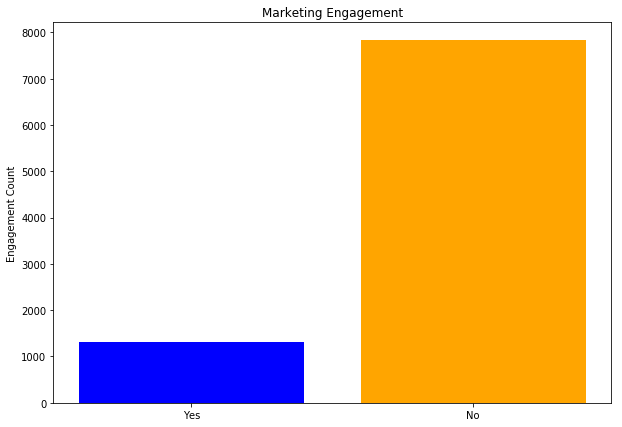

In [36]:
# Visualize this in a bar plot

fig, ax = plt.subplots(figsize=(10,7))
ax.bar('Yes',num_cust_resonse_yes, color='blue')
ax.bar('No', num_cust_resonse_no, color='orange' )
ax.set_title('Marketing Engagement')
ax.set_ylabel('Engagement Count')
plt.show()

#Condensed coding form
#ax = df.groupby('Response').count()['Customer'].plot(kind='bar', color='blue', grid=False, figsize=(10,7), title='Marketing Engagement')

In [7]:
# Calculate the percentages of the engaged and non-engaged customers
df.groupby('Response').count()['Customer'] / df.shape[0]

Response
No     0.856799
Yes    0.143201
Name: Customer, dtype: float64

From this output and from the plot, we can see that only about `14%` of the customers responded
to the marketing calls.

#### 2.2 - Engagement Rates by Offer Type
The Renew Offer Type column in this DataFrame contains the type of the renewal offer presented to the customers. We are going to look into what types of offers worked best for the engaged customers, customer who responded to marketing efforts

In [13]:
#Get the engagement rates per renewal offer type
by_offer_type = df.loc[df['Response'] == 'Yes' #Count only engaged customers
                       ].groupby(['Renew Offer Type' #Engaged customers grouped by renewal offer type
                                 ]).count()['Customer'] / df.groupby(['Renew Offer Type']).count()['Customer']

by_offer_type

Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64

In [95]:
by_offer_type = by_offer_type.fillna(0)

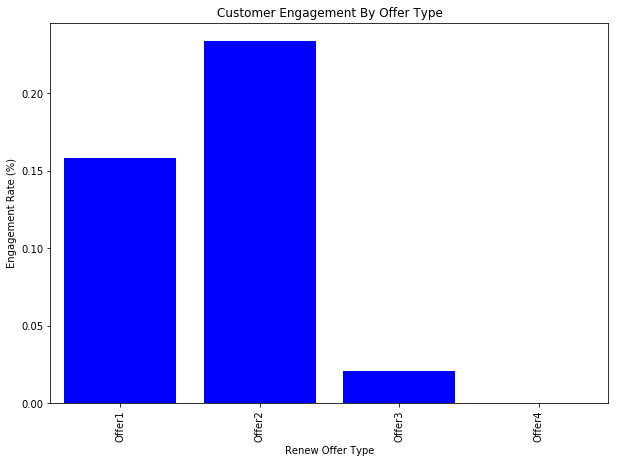

In [97]:
#Visualize results in a bar plot
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(by_offer_type.index, by_offer_type.values, color='blue')
ax.set_title('Customer Engagement By Offer Type')
ax.set_ylabel('Engagement Rate (%)')
plt.show

#condensed form 
ax = (by_offer_type).plot(kind='bar', color='blue', title='Customer Engagement By Offer Type')

As we can see, Offer2 had the highest engagement rate among the customers

### 2.3 - Offer Type & Vehicle Class
We are going to understand how customers with different attributes respond differently to different marketing messages. We start looking at the engagements rates by each offer type and vehicle class.

In [31]:
by_offer_type_df = df.loc[df['Response'] == 'Yes' #engaged customers
                         ].groupby(['Renew Offer Type', 'Vehicle Class'#Grouping the data by these two columns
                                   ]).count()['Customer'] / df.groupby(['Renew Offer Type']).count()['Customer']
by_offer_type_df

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    0.070362
                  Luxury Car       0.001599
                  Luxury SUV       0.004797
                  SUV              0.044776
                  Sports Car       0.011194
                  Two-Door Car     0.025586
Offer2            Four-Door Car    0.114833
                  Luxury Car       0.002051
                  Luxury SUV       0.004101
                  SUV              0.041012
                  Sports Car       0.016405
                  Two-Door Car     0.055366
Offer3            Four-Door Car    0.016760
                  Two-Door Car     0.004190
Name: Customer, dtype: float64

In [33]:
#Make the previous output more readable using unstack function
# to pivot the data and extract and transform the inner-level groups to columns
by_offer_type_df = by_offer_type_df.unstack().fillna(0)

In [34]:
by_offer_type_df

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,0.070362,0.001599,0.004797,0.044776,0.011194,0.025586
Offer2,0.114833,0.002051,0.004101,0.041012,0.016405,0.055366
Offer3,0.016760,0.000000,0.000000,0.000000,0.000000,0.004190


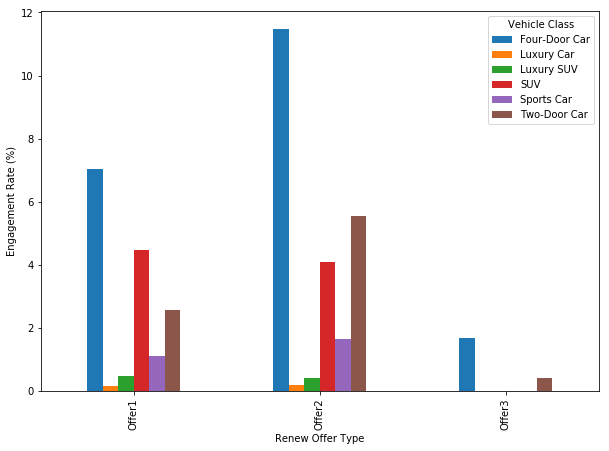

In [39]:
ax = (by_offer_type_df*100).plot(kind='bar', figsize=(10,7), grid=False)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

We already knew from the previous section `“Engagement Rates by Offer Type”` that `Offer2`
had the highest response rate among customers. Now we can add more insights by having broken
down the customer attributes with the category `“Vehicle class”`: we can notice that customers with
Four-Door Car respond more frequently for all offer types and that those with `“Luxury SUV”`
respond with a higher chance to `Offer2` than to `Offer1`. If we have significantly difference in the
response rates among different customer rates, we can fine-tune who to target for different set
of offers

#### 2.4 - Engagement Rates by Sales Channel
We are going to analyze how engagement rates differ by different sales channels.

In [101]:
by_sales_channel_df = df.loc[df['Response'] == 'Yes' #Look at Customers Who Only Responded Yes
                             ].groupby(['Sales Channel'
                                       ]).count()['Customer'] / df.groupby(['Sales Channel']).count()['Customer']
by_sales_channel_df

Sales Channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Customer, dtype: float64

In [108]:
total

53.259273404672314

In [114]:
for i in ax.patches:
    print(i.get_height())
    print((i.get_height()/total)*100)

19.15444348576359
35.96452272306669
11.453058044409817
21.5043452759629
10.878186968838527
20.42496315371101
11.773584905660377
22.10616884725939


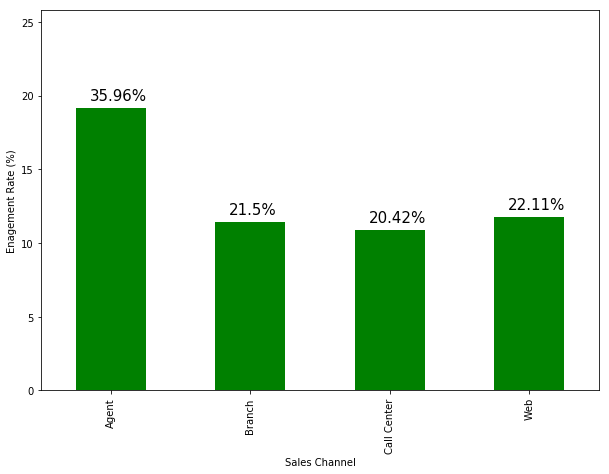

In [107]:
#Plot Results
ax = (by_sales_channel_df*100).plot(kind = 'bar', color = 'green', figsize=(10,7))
ax.set_ylabel('Enagement Rate (%)')

# create a list to collect the plt.patches data
totals = []

ax.set_ylim([0, max(by_sales_channel_df.values*100) + mean(by_sales_channel_df.values*100)/2])

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

#Set individual bar labels using above list
#total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.1, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')
    

As we can notice, Agent works better in term of getting responses from the customers, and then sales through Web works the second best. Let’s go ahead in breaking down this result deeper with different customers’ attributes.